# Perbaikan Citra (Operasi Titik)

In [ ]:
from google.colab import drive

# mounting dataset from gdrive
drive.mount('/content/gdrive', force_remount=True)

# dataset path
root_path = 'gdrive/My Drive/Colab Notebooks/Pengolahan_Citra_03/Lab03 Data/'

print("Path root : ", root_path)

Mounted at /content/gdrive
Path root :  gdrive/My Drive/Colab Notebooks/Pengolahan_Citra_03/Lab03 Data/


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Fungsi untuk membaca file yang ada di dalam folder
def read_image(image_path):
    bgr_img = cv2.imread(image_path)
    rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    return rgb_img

# Fungsi untuk menampilkan gambar   
def show_image(rgb_img):
  plt.figure(figsize=(10,20))
  plt.imshow(rgb_img)
  plt.axis('off')

(-0.5, 1418.5, 1000.5, -0.5)

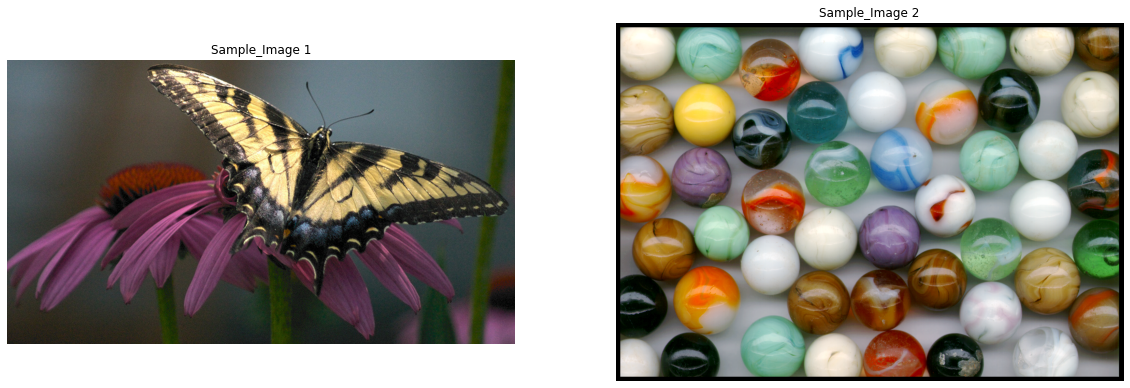

In [ ]:
rgb_img1 = read_image(root_path + 'sample1.jpg')
rgb_img2 = read_image(root_path + 'sample2.BMP')

# show each image sample
ax1 = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(rgb_img1)
plt.title('Sample_Image 1')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(rgb_img2)
plt.title('Sample_Image 2')
plt.axis('off')



(-0.5, 999.5, 559.5, -0.5)

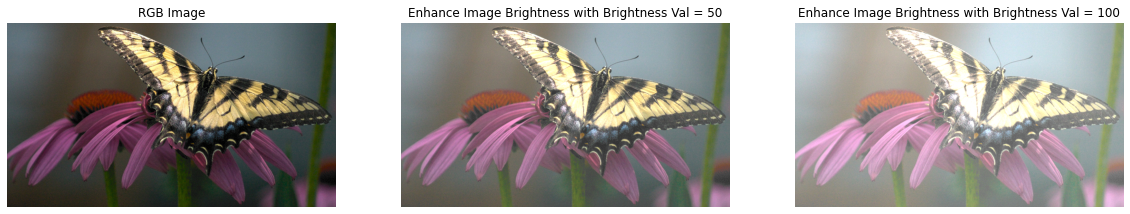

In [ ]:
# Perbaikan Brightness

def enhance_brightness(img, brightness_val=100):
  enh_bright = img.astype('float64') + brightness_val
  # clip
  enh_bright[enh_bright < 0] = 0
  enh_bright[enh_bright > 255] = 255
  return np.uint8(enh_bright)

# show images
ax1 = plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(rgb_img1)
plt.title('RGB Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(enhance_brightness(rgb_img1, brightness_val=50))
plt.title('Enhance Image Brightness with Brightness Val = 50')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(enhance_brightness(rgb_img1, brightness_val=100))
plt.title('Enhance Image Brightness with Brightness Val = 100')
plt.axis('off')


(-0.5, 999.5, 559.5, -0.5)

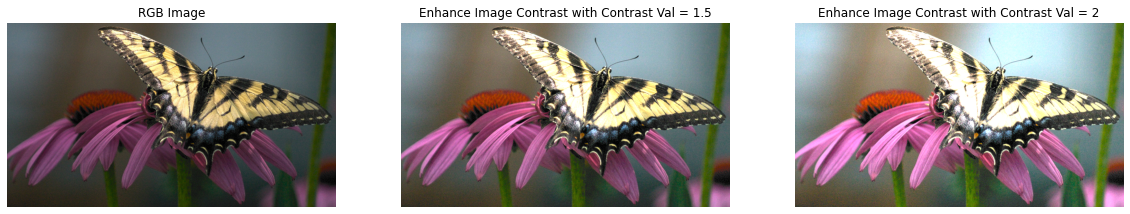

In [ ]:
# Perbaikan Kontras

def enhance_contrast(img, contrast_val=2, brightness_val=50):
  enh_contrast = img.astype('float64')*contrast_val + brightness_val
  # clip
  enh_contrast[enh_contrast < 0] = 0
  enh_contrast[enh_contrast > 255] = 255
  return np.uint8(enh_contrast)

# show images
ax1 = plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(rgb_img1)
plt.title('RGB Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(enhance_contrast(rgb_img1, contrast_val=1.5, brightness_val=0))
plt.title('Enhance Image Contrast with Contrast Val = 1.5')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(enhance_contrast(rgb_img1, contrast_val=2, brightness_val=0))
plt.title('Enhance Image Contrast with Contrast Val = 2')
plt.axis('off')

(-0.5, 999.5, 559.5, -0.5)

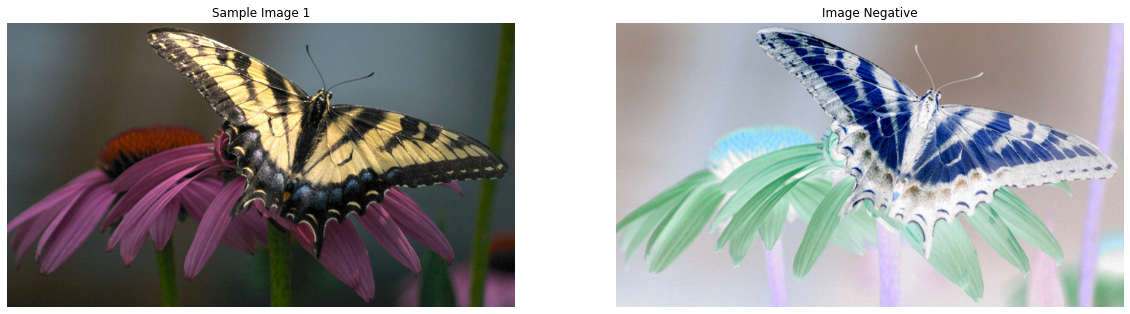

In [ ]:
# Citra Negatif

def enhance_image_negative(img):
  enh_negative = 255 - img.astype('float64')
  # clip
  enh_negative[enh_negative < 0] = 0
  enh_negative[enh_negative > 255] = 255
  return np.uint8(enh_negative)


# show images
ax1 = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(rgb_img1)
plt.title('Sample Image 1')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(enhance_image_negative(rgb_img1))
plt.title('Image Negative')
plt.axis('off')


(-0.5, 999.5, 559.5, -0.5)

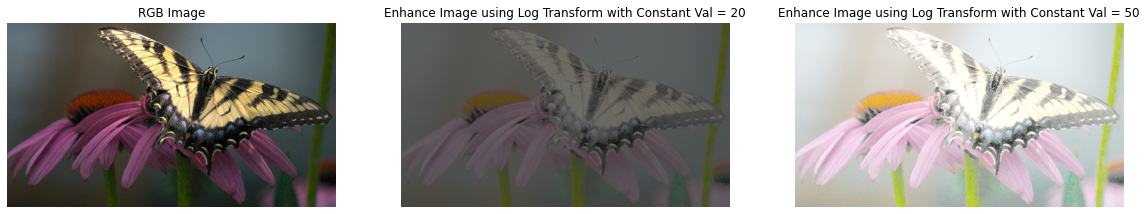

In [ ]:
# Transformasi Log

def enhance_log_transform(img, constant_val=50):
  enh_log = constant_val*np.log(1 + img.astype('float64'))
  # clip
  enh_log[enh_log < 0] = 0
  enh_log[enh_log > 255] = 255
  return np.uint8(enh_log)

# show images
ax1 = plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(rgb_img1)
plt.title('RGB Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(enhance_log_transform(rgb_img1, constant_val=20))
plt.title('Enhance Image using Log Transform with Constant Val = 20')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(enhance_log_transform(rgb_img1, constant_val=50))
plt.title('Enhance Image using Log Transform with Constant Val = 50')
plt.axis('off')

(-0.5, 999.5, 559.5, -0.5)

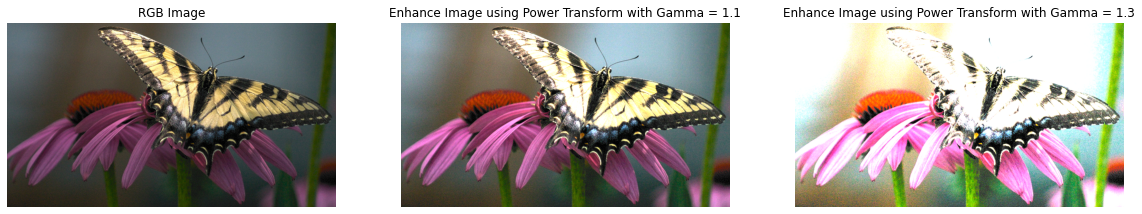

In [ ]:
# Transformasi Power

def enhance_power_transform(img, constant_val=1.2, gamma=1.2):
  enh_pow = constant_val*np.power(img.astype('float64'), gamma)
  # clip
  enh_pow[enh_pow < 0] = 0
  enh_pow[enh_pow > 255] = 255
  return np.uint8(enh_pow)

# show images
ax1 = plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(rgb_img1)
plt.title('RGB Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(enhance_power_transform(rgb_img1, constant_val=1, gamma=1.1))
plt.title('Enhance Image using Power Transform with Gamma = 1.1')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(enhance_power_transform(rgb_img1, constant_val=1, gamma=1.3))
plt.title('Enhance Image using Power Transform with Gamma = 1.3')
plt.axis('off')

(-0.5, 999.5, 559.5, -0.5)

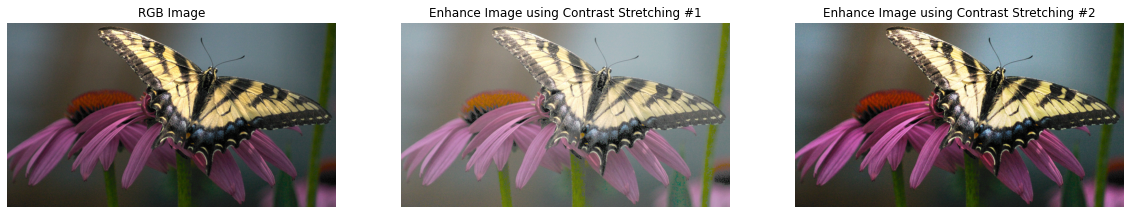

In [ ]:
def contrast_stretching(img,
                        thresh1=(0,0),
                        thresh2=(50,50),
                        thresh3=(150,200),
                        thresh4=(255,255)):
  
  cont_stretch = img.astype('float64')
  result = np.zeros(img.shape, dtype=np.float64)

  m1 = (thresh2[1] - thresh1[1])/(thresh2[0] - thresh1[0])
  result[cont_stretch < thresh2[0]] = \
  m1*cont_stretch[cont_stretch < thresh2[0]]

  m2 = (thresh3[1] - thresh2[1])/(thresh3[0] - thresh2[0])
  result[(cont_stretch >= thresh2[0]) & (cont_stretch <= thresh3[0])] = \
  m2*(cont_stretch[(cont_stretch >= thresh2[0]) & \
                   (cont_stretch <= thresh3[0])] - thresh2[0]) + thresh2[1]
  
  m3 = (thresh4[1] - thresh3[1])/(thresh4[0] - thresh3[0])
  result[cont_stretch > thresh3[0]] = \
  m3*(cont_stretch[cont_stretch > thresh3[0]] - thresh3[0]) + thresh3[1]

  result[result < 0] = 0
  result[result > 255] = 255
  return np.uint8(result)

ax1 = plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(rgb_img1)
plt.title('RGB Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(contrast_stretching(rgb_img1,
                               thresh1=(0,0),
                               thresh2=(20,80),
                               thresh3=(120,180),
                               thresh4=(255,255)))
plt.title('Enhance Image using Contrast Stretching #1')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(contrast_stretching(rgb_img1,
                               thresh1=(0,0),
                               thresh2=(50,50),
                               thresh3=(150,200),
                               thresh4=(255,255)))
plt.title('Enhance Image using Contrast Stretching #2')
plt.axis('off')

# Postest

1 . Perbaikan Kontras pada citra sampel 2 (rgb_img2)

(-0.5, 1418.5, 1000.5, -0.5)

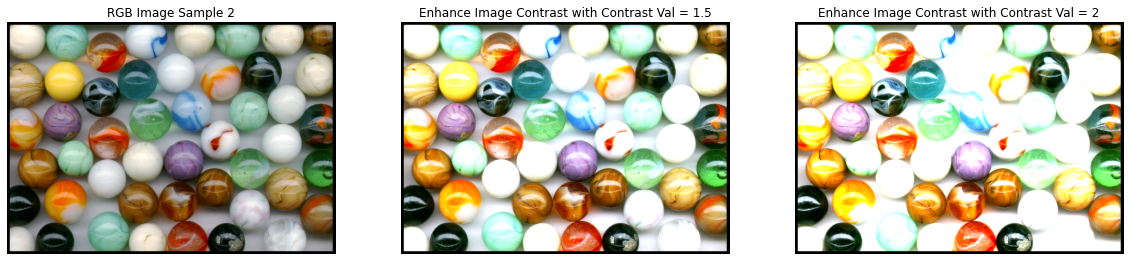

In [ ]:
# 1 . Perbaikan Kontras pada citra sampel 2 (rgb_img2)

# show images
ax1 = plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(rgb_img2)
plt.title('RGB Image Sample 2')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(enhance_contrast(rgb_img2, contrast_val=1.5, brightness_val=0))
plt.title('Enhance Image Contrast with Contrast Val = 1.5')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(enhance_contrast(rgb_img2, contrast_val=2, brightness_val=0))
plt.title('Enhance Image Contrast with Contrast Val = 2')
plt.axis('off')

2. Terapkan peregangan kontras pada citra sampel 2 (rgb_img2) dengan threshold yang anda atur sendiri

(-0.5, 1418.5, 1000.5, -0.5)

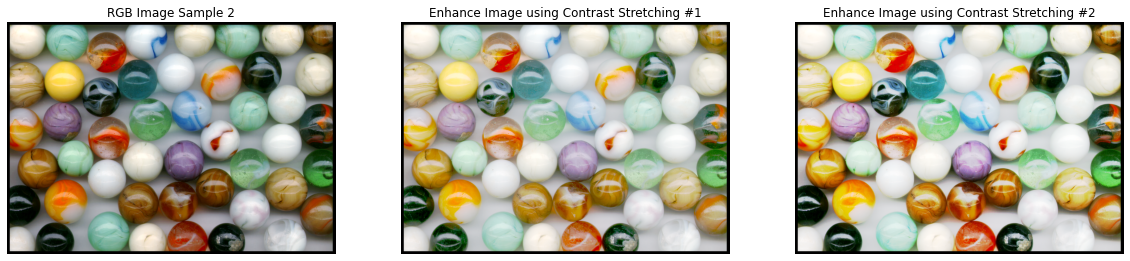

In [ ]:
# 2. Terapkan peregangan kontras pada citra sampel 2 (rgb_img2) dengan threshold yang anda atur sendiri

ax1 = plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(rgb_img2)
plt.title('RGB Image Sample 2')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(contrast_stretching(rgb_img2,
                               thresh1=(0,0),
                               thresh2=(20,80),
                               thresh3=(120,180),
                               thresh4=(255,255)))
plt.title('Enhance Image using Contrast Stretching #1')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(contrast_stretching(rgb_img2,
                               thresh1=(0,0),
                               thresh2=(30,50),
                               thresh3=(120,200),
                               thresh4=(255,255)))
plt.title('Enhance Image using Contrast Stretching #2')
plt.axis('off')